Optimizing code:
- your laptop is basically a mini cluster because it can run multiple processes at once
- can take advantage of this to make code faster by using JAX
- does array-oriented numerical computation - basically can replace numpy
- has jit (just in time compiling) to make functions much faster if you call them many times
- includes automatic differentiation for all functions so makes some things like root finding faster
- can run on GPUs or TPUs (tensor processing units) also

- most numpy routines work the same in JAX, but not all of them
- first make sure that your code works with numpy and then translate into JAX
- important difference: JAX arrays are immutable, ie you cannot change a value in an array, so every time you do a line that's updating a value in an array it makes a new array behind the scenes which could slow it down
- random numbers work differently because each thread needs a different seed 

- gradient method combines numerical methods with something like actually symbolic math by doing an approximation of the the curve

In [12]:
import multiprocessing

In [26]:
def print_cube(num):
    print('Cube: {}'.format(num*num*num))

def print_square(num):
    print('Square: {}'.format(num*num))

In [34]:
p1=multiprocessing.Process(target=print_cube,args=(10,)) #needs to be in a python file with the main wrapper thing
p2=multiprocessing.Process(target=print_square,args=(10,))
p1.start()
p2.start()
p1.join() #wait until process 1 is finished
p2.join() #same
print('Done!')

Done!


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'print_cube' on <module '__main__' (<class '_frozen_importlib.BuiltinImporter'>)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 

- might be possible to implement JAX for final project but not GPU usage
- could get improvements in timing of around one order of magnitude
- use time module to figure out which parts of the code really need to be improved instead of trying to use jax on everything

New topic: parameter estimation
- this is a subset of the larger topic of optimization
- goal is to optimize the parameters of a function

Common usage: fitting a line to data
- this isn't always a good idea based on theoretical model of a problem
- people often fit a line even when theory doesn't tell use that there should be a linear relationship because it is easy
- least-square fitting
    - method of fitting a line to points in 2D
    - solution is exact in that it minimizes the objective function chi squared which is the total squared error normalized by the errors
    - done with some matrix operations
    - is this really the best fit line? what does best fit mean?

Generative model
- way of testing the model and exploring the assumptions that were made
- can prove that minimizing chi-squared gives you the highest probability of the points being recreated by the line

In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
def f(x,m=1,b=0):
    return m*x+b

In [138]:
f_vec=np.vectorize(f)

In [140]:
numpoints=50

In [142]:
Xs=np.random.rand(numpoints)

In [144]:
Ys=f_vec(Xs)

In [146]:
y_sigma=0.2

In [148]:
Ys=Ys+np.random.normal(scale=y_sigma,size=numpoints)

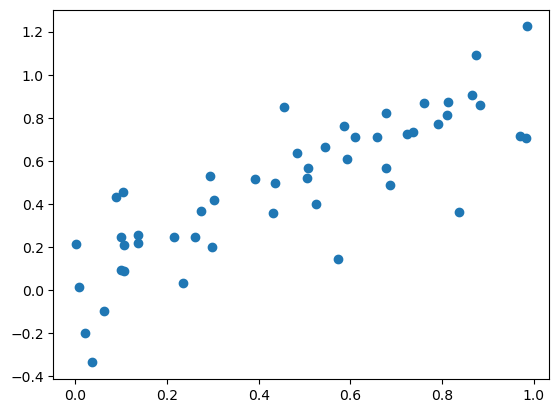

In [150]:
plt.scatter(Xs,Ys)

In [152]:
params, error_matrix=np.polyfit(Xs,Ys,deg=1,w=1/(y_sigma*np.ones(numpoints)),cov=True) #what are you supposed to put for the weights?

In [154]:
params

array([0.90572438, 0.06118891])

In [156]:
error_matrix

array([[ 0.0076233 , -0.00354539],
       [-0.00354539,  0.00233936]])

In [158]:
def get_params():
    Xs=np.random.rand(numpoints)
    Ys=f_vec(Xs)
    Ys=Ys+np.random.normal(scale=y_sigma,size=numpoints)
    params, error_matrix=np.polyfit(Xs,Ys,deg=1,w=1/(y_sigma*np.ones(numpoints)),cov=True)
    return params

In [170]:
numruns=300

In [172]:
params=np.zeros((numruns,2))
diffs=np.zeros((numruns,2))

In [174]:
for i in range(numruns):
    params[i,:]=get_params()
    diffs[i,:]=np.array([1,0])-params[i,:]

(array([ 1., 10., 26., 44., 62., 83., 43., 15., 14.,  2.]),
 array([-0.32524876, -0.2606171 , -0.19598543, -0.13135377, -0.0667221 ,
        -0.00209044,  0.06254122,  0.12717289,  0.19180455,  0.25643622,
         0.32106788]),
 <BarContainer object of 10 artists>)

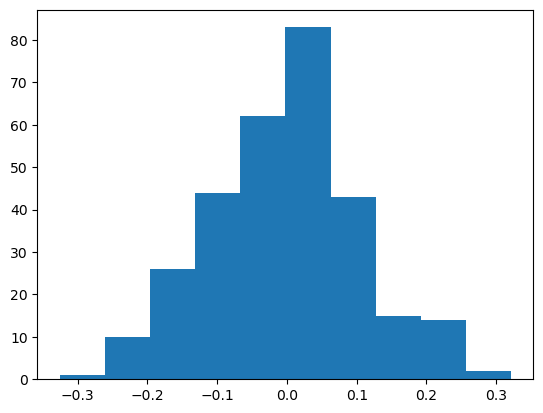

In [176]:
plt.hist(diffs[:,0])

(array([ 8., 14., 15., 53., 65., 65., 38., 25., 13.,  4.]),
 array([-0.163245  , -0.13064905, -0.09805309, -0.06545714, -0.03286118,
        -0.00026523,  0.03233073,  0.06492668,  0.09752264,  0.1301186 ,
         0.16271455]),
 <BarContainer object of 10 artists>)

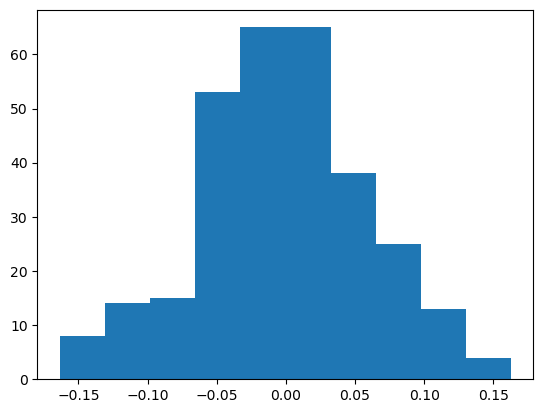

In [178]:
plt.hist(diffs[:,1])

So the errors on the parameters is gaussian distributed, and the error on the generated data was gaussian distributed, so that's what it means to be best fit in this case.